<a href="https://colab.research.google.com/github/DBCooper200/project_dl/blob/main/2_gradient_descent_logloss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
%matplotlib inline

In [4]:
df=pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2,random_state=25)

In [10]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100
#scaling done to bring affordability and age in the same range this is done to make ml model work better

In [12]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])
#kernel_init s initial weight
#(2,) represents 2 input neurons

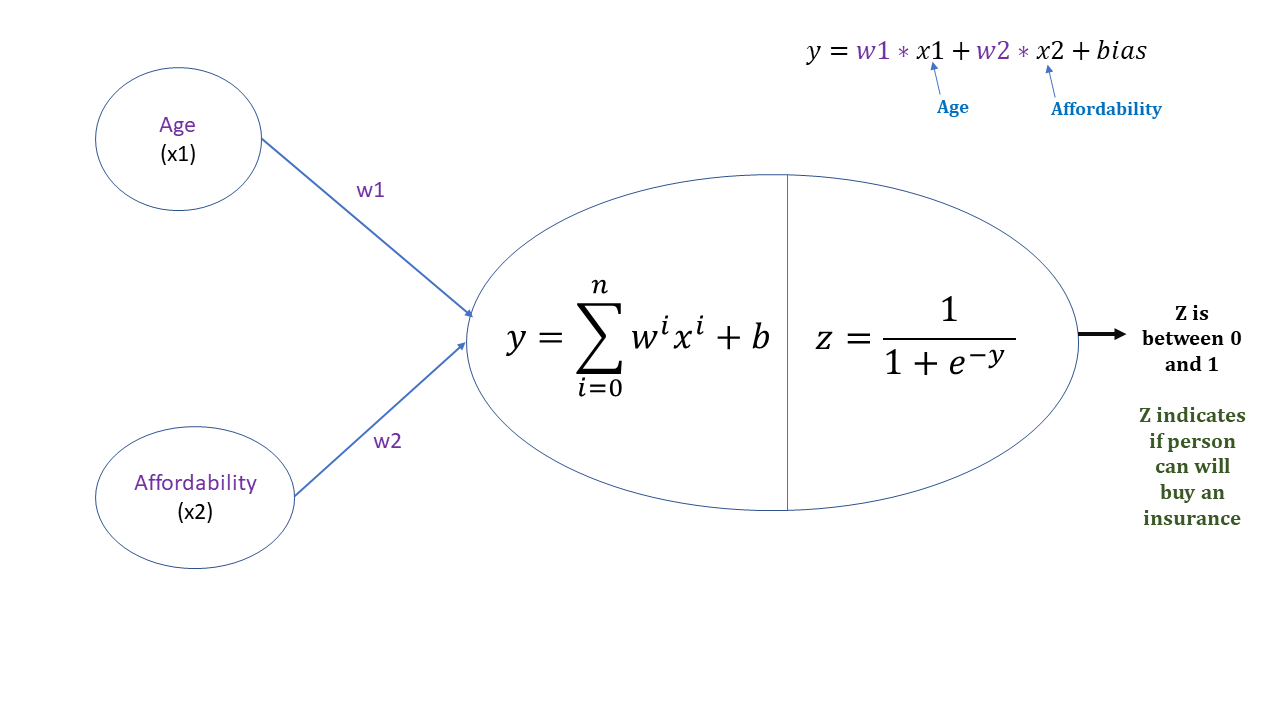

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#binary crossentropy is same as log loss
#log loss is good for logistic regression

In [14]:
model.fit(X_train_scaled, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 0.5333 - accuracy: 0.7273
Epoch 2473/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5332 - accuracy: 0.7273
Epoch 2474/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5332 - accuracy: 0.7273
Epoch 2475/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5332 - accuracy: 0.7273
Epoch 2476/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5331 - accuracy: 0.7273
Epoch 2477/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.5331 - accuracy: 0.7273
Epoch 2478/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5330 - accuracy: 0.7273
Epoch 2479/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5330 - accuracy: 0.7273
Epoch 2480/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5330 - accuracy: 0.7273
Epoch 2481/5000
1/1 [==========================

In [16]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 78ms/step


array([[0.70548475],
       [0.3556957 ],
       [0.16827832],
       [0.4780119 ],
       [0.72606957],
       [0.82949823]], dtype=float32)

In [17]:
X_test_scaled
# thus at 47 having an affordability 1 the chance of buying is >0.5 thus he will buy it

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [19]:
coef, intercept = model.get_weights()
coef, intercept 
#coef has two values because 2 coeffs or weights each for one of the features

(array([[5.0608625],
        [1.408652 ]], dtype=float32), array([-2.9137027], dtype=float32))

In [20]:
#NOW WE BULD THE NN FROM SCRATCH
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [21]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

0.7054847702382996

In [22]:
#gradient descent manually
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]#to convert 0s to a value close to 0
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]#to convert 1s to a value close to it
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [23]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))
#example
sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [25]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))#dot product bcuz age and yp-y are vectors
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) #transpose is needed to make dot product possible

        bias_d = np.mean(y_predicted-y_true)#the formula is literally mean
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
#loss threshold was obtained from tensorflow operation this will allow us to limit epochs
        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [26]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

we usually stop when loss s nearly equal for different epochs or iterations
comaring weights, bias and coeff and intercept we realize they r similar in both the methods